## Quiz 9 - Decision Trees

1.) Work to improve the model performance for the diabetes decision tree we created in class. You should be able to improve the precision and recall to be above .8 and .7 respectively. You can improve the preprocessing OR alter the model itself.

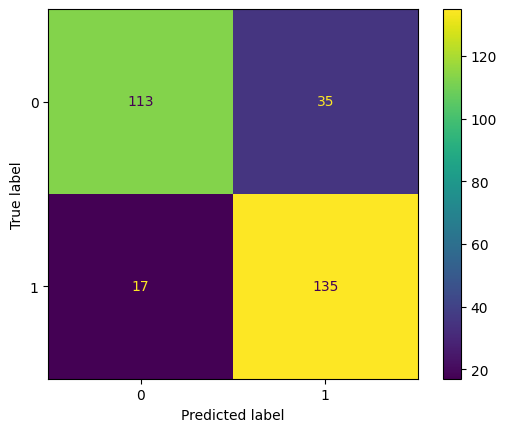

In [70]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import ClusterCentroids
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

diabetes_df = pd.read_csv('../Misc./diabetes.csv')
db_df = diabetes_df.drop(['BloodPressure', 'SkinThickness'], axis = 1) # Dropped low-corr columns.

ros = RandomOverSampler(random_state = 32) # Oversampled.
X_resampled, y_resampled = ros.fit_resample(db_df.drop('Outcome', axis = 1), db_df['Outcome'])

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 32)

model = tree.DecisionTreeClassifier(max_depth = 11, random_state = 32)  # Increased number of nodes to 11.
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [66]:
# New Precision:
(135)/(135 + 35)

0.8148148148148148

In [67]:
# New Recall:
(135)/(135 + 17)

0.8881578947368421

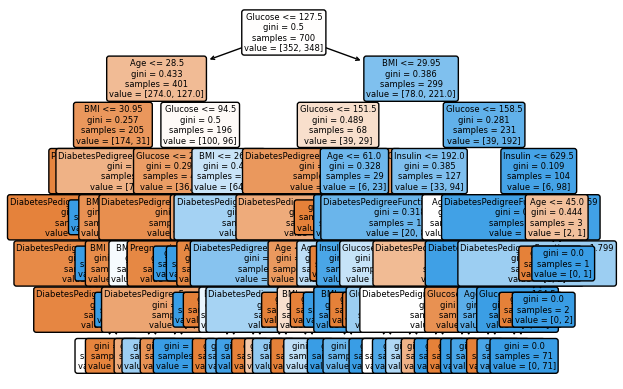

<Figure size 640x480 with 0 Axes>

In [52]:
import matplotlib.pyplot as plt
tree.plot_tree(model, feature_names = list(X.columns),
               filled = True, fontsize = 6, rounded = True)

plt.show()
plt.savefig("tree.svg") # SVG are best files to use for graphics

# "Yes"'s are always on the left, "No"'s always on the right.

2.) Create a function that accepts an array of names and returns a string formatted as a list of names separated by commas EXCEPT for the last two names, which are separated by an ampersand (and sign - &)

In [71]:
def organize_names(array_of_names):
    if len(array_of_names) == 0:
        return ""
    elif len(array_of_names) == 1:
        return array_of_names[0]['name']
    else:
        formatted_names = array_of_names[0]['name']
        for name_entry in array_of_names[1:-1]:
            formatted_names += ', ' + name_entry['name']
        formatted_names += ' & ' + array_of_names[-1]['name']
        return formatted_names
    
example_array = ({'name': 'Connor'}, {'name': 'Todd'}, {'name': 'John'}, {'name': 'Evan'})
formatted_example = organize_names(example_array)
print(formatted_example)

Connor, Todd, John & Evan
